Polynomial Linear Regression : We will first perform simple linear regression and then polynomial linear regression <br>
We will going to work on our dataset


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [6]:
# Generating a dataset from equation  (y=0.8*X**2  +  0.9 *X +2)
X=6*np.random.rand(200,1)-3
#X is generate random float value then multiply by 6 and substract 3 with 200 rows and 1 column
y=  y=0.8*X**2  +  0.9 *X +2 +   np.random.rand(200,1)

Text(0, 0.5, 'y')

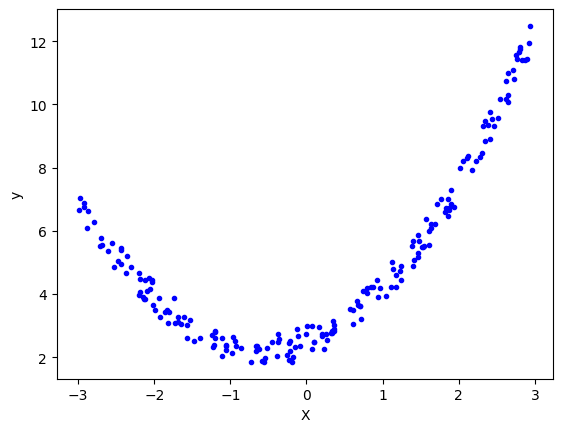

In [11]:
plt.plot(X,y,'b.')
# plt.scatter(X,y)  // both will plot scattter plot 'b.' for blue dot
plt.xlabel("X")
plt.ylabel("y")

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.4419636494422692

Text(0, 0.5, 'y')

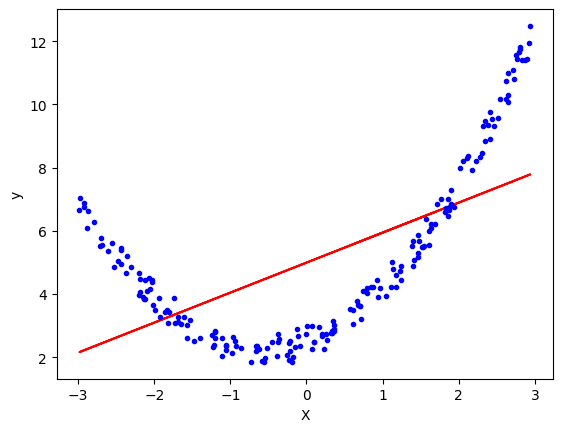

In [27]:
# plotting sctter plot with best fit line via Linear Regression
plt.plot(X_train,lr.predict(X_train),color='red')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")

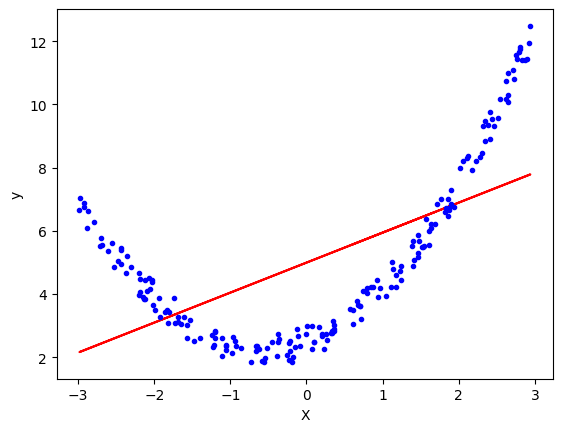

#Now we will apply Polynomial Regression

In [37]:
# degree =2  (if we have 1 input column degree 2 will make them 3 for n degree their will be n+1 column)
poly=PolynomialFeatures(degree=2,include_bias=True)
# if we pass include_bias=False in poly object then only
# column from input column we get will n   that is eqals to degree
# not n+1

X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

We will aply poly only on input  not on  y . <br>
input train and test dono ke upar apply larna padega<br>

y train and y test par apply nhi hoga

In [38]:
print(X_train[0])  # thus was original 1 column tha to jo transform hokar 3 ho gaye [1.         1.68308686 2.83278137]
# x^0   X^1   X^2  or degree 2
print(X_train_trans[0])

[1.68308686]
[1.         1.68308686 2.83278137]


In [39]:
#include bias parameter



In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [42]:
y_pred=lr.predict(X_test_trans)

In [43]:
r2_score(y_test,y_pred)

0.9882040139028401

In [46]:
print(lr.coef_)  # x^0,X^1,X^2

[[0.         0.90971006 0.80354854]]


In [47]:
print(lr.intercept_)

[2.47149546]


In [52]:

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

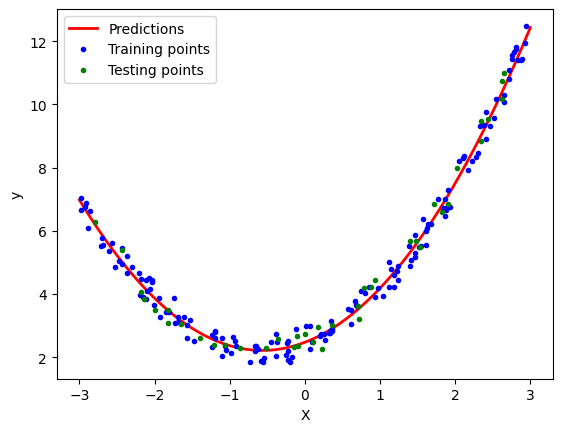

In [53]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

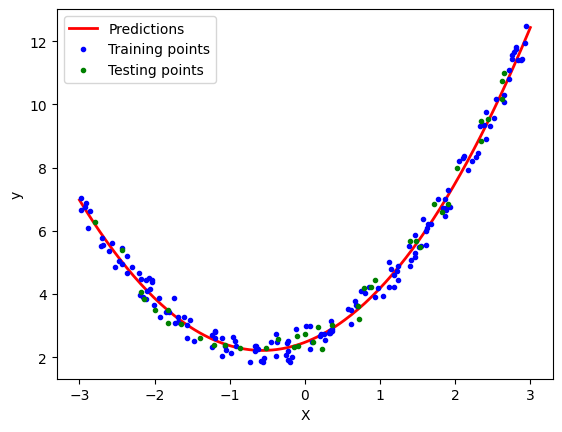